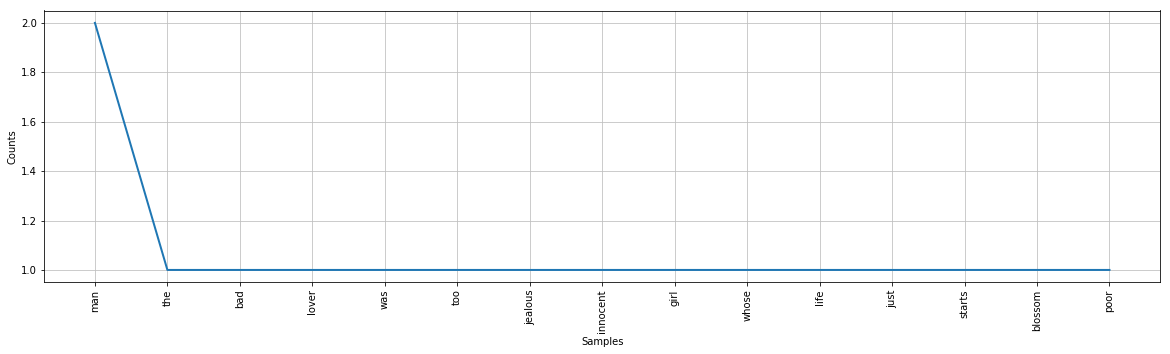

    bad  blossom  girl  innocent  jealous  just  life  lover  poor  starts  \
0   0.0      0.0   0.0       0.0      0.0   0.0   0.0    0.0   0.0     0.0   
1   0.0      0.0   0.0       0.0      0.0   0.0   0.0    0.0   0.0     0.0   
2   1.0      0.0   0.0       0.0      0.0   0.0   0.0    0.0   0.0     0.0   
3   0.0      0.0   0.0       0.0      0.0   0.0   0.0    1.0   0.0     0.0   
4   0.0      0.0   0.0       0.0      0.0   0.0   0.0    0.0   0.0     0.0   
5   0.0      0.0   0.0       0.0      0.0   0.0   0.0    0.0   0.0     0.0   
6   0.0      0.0   0.0       0.0      1.0   0.0   0.0    0.0   0.0     0.0   
7   0.0      0.0   0.0       1.0      0.0   0.0   0.0    0.0   0.0     0.0   
8   0.0      0.0   1.0       0.0      0.0   0.0   0.0    0.0   0.0     0.0   
9   0.0      0.0   0.0       0.0      0.0   0.0   0.0    0.0   0.0     0.0   
10  0.0      0.0   0.0       0.0      0.0   0.0   1.0    0.0   0.0     0.0   
11  0.0      0.0   0.0       0.0      0.0   1.0   0.0    0.0   0

16

<Figure size 1440x360 with 0 Axes>

In [101]:
import nltk, re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
#sent="Olalekan ni oruko mi; omo ile rere nimi ni ilu Iseyin. E bami dupe lowo Baba to bimi lomo. Ade rere ni awa nde nile olomodudu. oruko rere san ju wura ati fadaka lo"
sent="The man is a bad lover. He was too jealous of an innocent girl whose life just starts to blossom. Poor man!"
sent1=re.sub(r'[^a-zA-Z]',' ',sent)
sent2=sent1.lower().split()
sent3=[]
for w in sent2:
    if len(w)>2:
        sent3.append(w)
from nltk.probability import FreqDist
sfd=FreqDist(sent3)
plt.figure(figsize=(20,5))
sfd.plot()
tfidf=TfidfVectorizer(min_df=1,max_df=1)
features=tfidf.fit_transform(sent3)
plt.figure(figsize=(20,5))
print(pd.DataFrame(features.todense(),
             columns=tfidf.get_feature_names())
            )
len(sent3)


In [102]:
from sklearn.decomposition import TruncatedSVD
tsvd=TruncatedSVD(n_components=10)
tsvd.fit_transform(features)

array([[ 3.60266904e-01, -5.12785892e-01, -2.92073836e-01,
         8.52596549e-02,  7.09186310e-02, -2.91678407e-01,
         1.42845539e-01, -8.67361738e-17,  3.46959729e-01,
        -2.74244376e-01],
       [ 1.53331650e-16,  8.46278410e-17, -9.61767496e-17,
        -9.17855586e-18,  3.56144384e-17, -1.53602999e-16,
         1.05560280e-16, -9.56842512e-17, -7.10984836e-17,
        -2.03925696e-17],
       [ 1.38777878e-17, -5.89805982e-17, -1.45716772e-16,
        -5.98479599e-17,  3.12250226e-17,  7.28583860e-17,
        -1.24900090e-16,  1.00000000e+00,  3.12250226e-16,
        -7.28583860e-17],
       [-1.02021770e-01, -1.65602353e-01,  5.73162616e-01,
         3.22173622e-01, -1.62772897e-01,  1.98789001e-01,
         7.07841477e-03, -3.26128013e-16,  4.26803759e-02,
        -7.27061771e-02],
       [-1.14082794e-01,  8.06973878e-02, -1.52916612e-01,
         1.99955483e-01,  2.65369303e-01,  1.70027145e-01,
         6.47745056e-01,  7.63278329e-17, -9.94984551e-02,
         2.

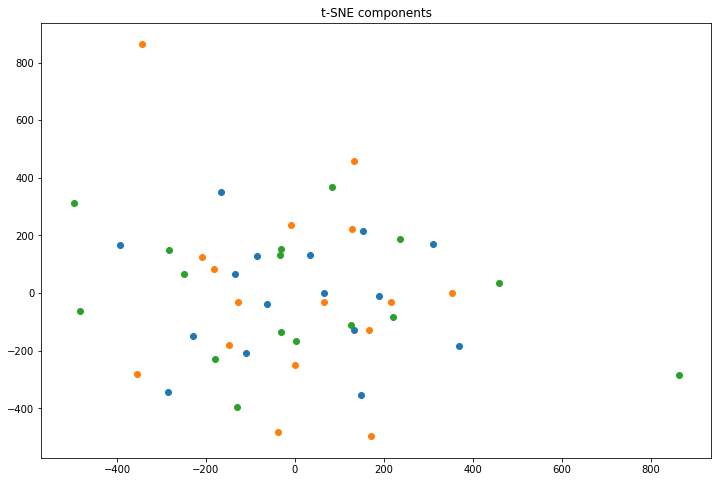

In [103]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3).fit_transform(features.toarray())

plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(tsne[:,0], tsne[:,1])
plt.scatter(tsne[:,1], tsne[:,2])
plt.scatter(tsne[:,2], tsne[:,0])

In [109]:
from gensim.models import Word2Vec 
w=Word2Vec(sent3, size=21, window=2, min_count=2, workers=4, sg=1)

w.wv.most_similar('l')


[('m', 0.40714380145072937),
 ('h', 0.2225465327501297),
 ('n', 0.19258058071136475),
 ('a', 0.15557004511356354),
 ('u', 0.1391935646533966),
 ('t', 0.10924649238586426),
 ('j', 0.040425628423690796),
 ('i', -0.009716764092445374),
 ('s', -0.05306787043809891),
 ('r', -0.08999501913785934)]

In [95]:
from gensim.models import FastText
ted = FastText(sent3, size=20, window=3, min_count=2, workers=4,sg=0)

In [100]:
ted.wv.most_similar('')

KeyError: 'all ngrams for word il absent from model'